___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [6]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

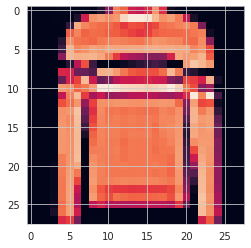

In [8]:
plt.imshow(X_train[5])
# plt.matshow(X_train[9])

In [9]:
y_train[5]

2

In [10]:
y_train.shape

(60000,)

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [13]:
y_train[5]

2

In [14]:
classes[int(y_train[5])]

# classes[y_train[9]]

'Pullover'

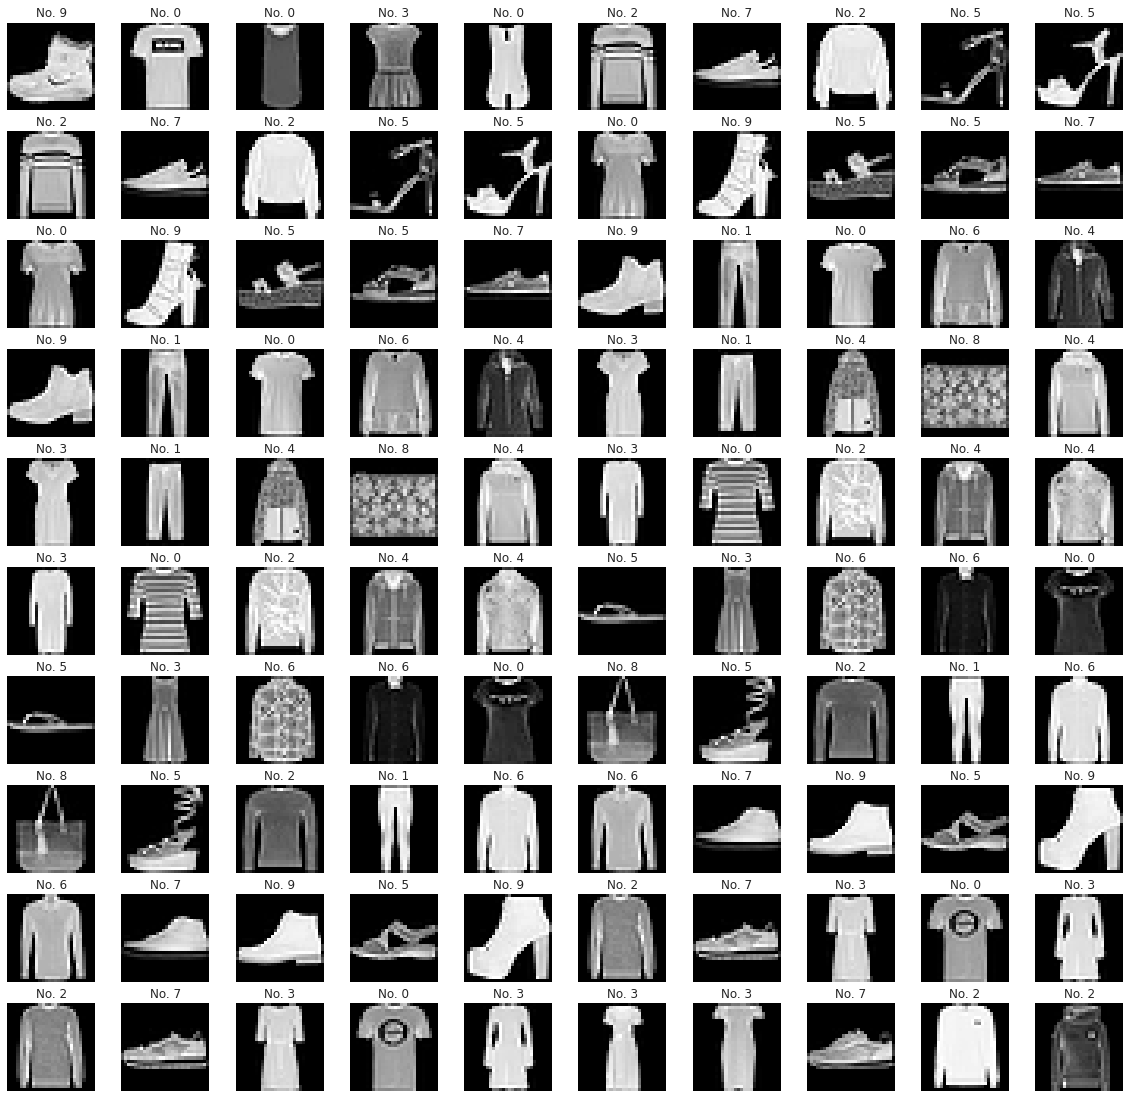

In [15]:
num_rows, num_cols = 10, 10
f, ax = plt.subplots(10, 10, figsize=(20,20),
                     gridspec_kw={'wspace':0.3, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [16]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[9].min()

0

In [18]:
X_train[9].max()

255

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[9].min()

0.0

In [21]:
X_train[9].max()

1.0

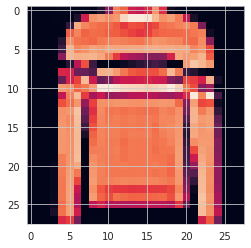

In [22]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [25]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
Y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization

In [34]:
model = Sequential()

model.add(Conv2D(28, (3,3), padding='same', activation='relu', input_shape=(28,28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(28, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [38]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 28s 8ms/step - loss: 0.9884 - accuracy: 0.6556 - val_loss: 0.4770 - val_accuracy: 0.8186
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5414 - accuracy: 0.8144 - val_loss: 0.3994 - val_accuracy: 0.8537
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4483 - accuracy: 0.8511 - val_loss: 0.4371 - val_accuracy: 0.8502
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4010 - accuracy: 0.8677 - val_loss: 0.3012 - val_accuracy: 0.8943
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3701 - accuracy: 0.8792 - val_loss: 0.2829 - val_accuracy: 0.9057
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3492 - accuracy: 0.8852 - val_loss: 0.2591 - val_accuracy: 0.9104
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3314 - accuracy: 0.8917 - val_loss: 0.2527 - val_ac

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.988,0.656,0.477,0.819
1,0.541,0.814,0.399,0.854
2,0.448,0.851,0.437,0.850
3,0.401,0.868,0.301,0.894
4,0.370,0.879,0.283,0.906


**TASK 7: Plot values of metrics you used in your model.**

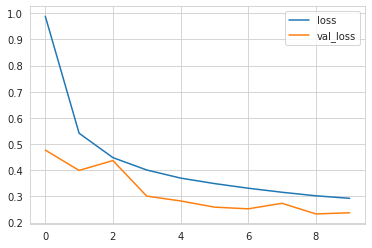

In [41]:
summary[["loss", "val_loss"]].plot();

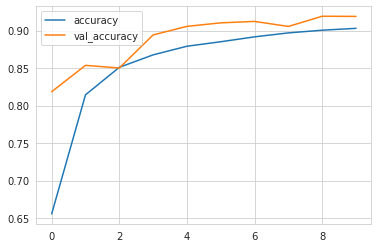

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

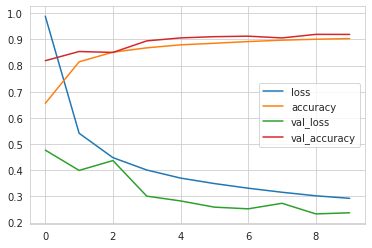

In [44]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [45]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2375 - accuracy: 0.9190


[0.23753954470157623, 0.9190000295639038]

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23753954470157623
Test accuracy: 0.9190000295639038


In [48]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.2162229e-07, 2.1081451e-07, 1.4464922e-07, ..., 6.5309729e-04,
        3.0889120e-07, 9.9917883e-01],
       [2.1277121e-04, 5.6275912e-06, 9.8424917e-01, ..., 6.5869710e-07,
        6.3131670e-06, 5.0162095e-07],
       [7.6432179e-06, 9.9993873e-01, 5.3107879e-06, ..., 4.3603040e-07,
        1.5086878e-06, 1.1438807e-06],
       ...,
       [2.4552748e-05, 5.7362718e-07, 8.6102227e-06, ..., 2.4101137e-06,
        9.9992287e-01, 1.0569561e-06],
       [2.1394046e-05, 9.9983752e-01, 1.7390086e-05, ..., 1.5857207e-06,
        4.9972850e-06, 2.7832230e-06],
       [8.9752510e-05, 2.4282606e-05, 3.4071960e-05, ..., 6.6125258e-03,
        3.1721769e-04, 1.8537295e-03]], dtype=float32)

In [49]:
pred_prob.shape

(10000, 10)

In [50]:
pred_prob[0]

array([1.2162229e-07, 2.1081451e-07, 1.4464922e-07, 2.4523715e-07,
       2.7101717e-07, 1.6646509e-04, 2.3674004e-07, 6.5309729e-04,
       3.0889120e-07, 9.9917883e-01], dtype=float32)

In [51]:
np.argmax(pred_prob[0])

9

In [52]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [53]:
y_pred.shape

(10000,)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.93      0.84      0.88      1000
           3       0.87      0.95      0.91      1000
           4       0.85      0.88      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.77      0.77      1000
           7       0.98      0.95      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [55]:
print(confusion_matrix(y_test, y_pred))

[[865   0  14  32   3   1  80   0   5   0]
 [  0 979   0  16   2   0   1   0   2   0]
 [ 13   1 842   9  75   0  60   0   0   0]
 [  8   0   8 951  10   0  23   0   0   0]
 [  0   0   8  41 879   0  72   0   0   0]
 [  0   0   0   0   0 988   0   5   0   7]
 [ 83   0  34  44  65   0 771   0   3   0]
 [  0   0   0   0   0  13   0 952   0  35]
 [  1   0   1   4   1   1   5   0 987   0]
 [  0   0   0   0   0   5   0  18   1 976]]


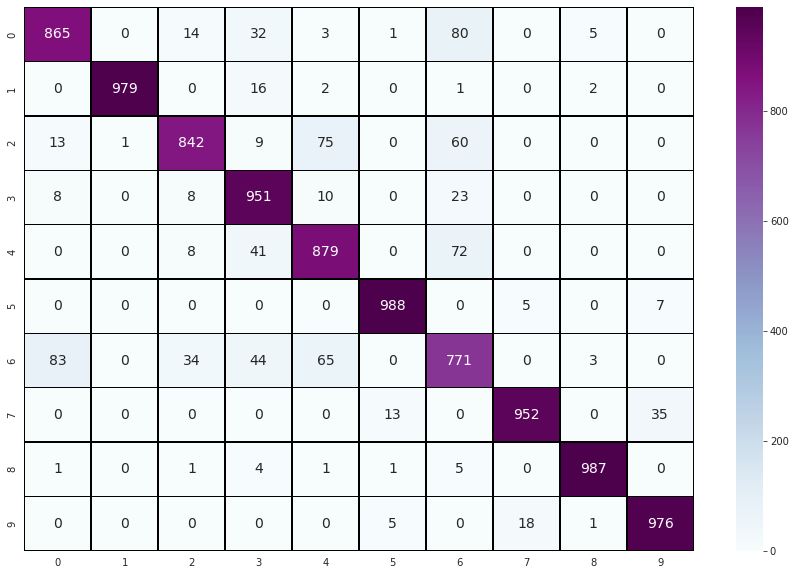

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="BuPu", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [106]:
my_image = X_test[10]

In [107]:
my_image.shape

(28, 28, 1)

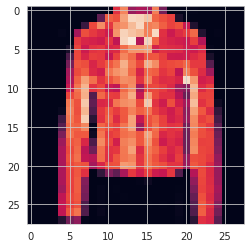

In [108]:
plt.imshow(my_image.reshape(28,28));

In [111]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [112]:
pred_prob = model.predict(my_image.reshape(1,28,28,1))
pred_prob

array([[1.19741917e-05, 5.97178723e-06, 1.27303763e-03, 1.07819644e-04,
        9.92044806e-01, 8.39762961e-08, 6.55228365e-03, 2.30934717e-07,
        3.48459844e-06, 2.87004667e-07]], dtype=float32)

In [110]:
y_pred = np.argmax(pred_prob)
y_pred

4

In [113]:
np.argmax(image_prediction, axis=1)

array([4])

In [114]:
result = np.argmax(image_prediction, axis=1)
result

array([4])

In [115]:
classes[int(result)]

'Coat'

In [116]:
model.save("cnn-1.h5")

In [117]:
model=tf.keras.models.load_model('cnn-1.h5')

In [202]:
pred=model.predict(np.expand_dims(X_test[14],axis=0))

In [203]:
np.argmax(pred)

4

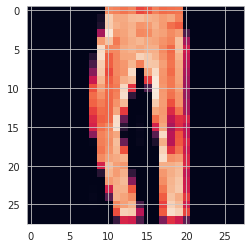

In [204]:
plt.imshow(X_test[5].reshape(28,28))

In [207]:
classes[int(result)]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___